In [1]:
import librosa
import os
import pandas as pd
import glob
import numpy as np
import soundfile
from sklearn.model_selection import train_test_split

In [8]:
result=np.array([])
aud = "D:/AAA_video_course/Programming/dataset/Actor_05/03-01-01-01-01-02-05.wav"
aud,sr = librosa.load(aud)
mfccs1=np.mean(librosa.feature.mfcc(y=aud, sr=sr, n_mfcc=40).T,axis=0)
result=np.hstack((result, mfccs1))

aud2 = "D:/AAA_video_course/Programming/dataset/Actor_05/03-01-02-01-01-02-05.wav"
aud2,sr = librosa.load(aud2)
mfccs2=np.mean(librosa.feature.mfcc(y=aud2, sr=sr, n_mfcc=40).T,axis=0)
result=np.hstack((result, mfccs2))


In [6]:
result.shape

(80,)

In [92]:
def extract_feature(file_name,mfcc,chroma,mel,zcr,rmse):
    with soundfile.SoundFile(file_name) as sound_file:
        X = sound_file.read(dtype="float32")
        sample_rate=sound_file.samplerate
        stft=np.abs(librosa.stft(X))
        result=np.array([])
        
        if mfcc:
            mfccs=np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
       
            result=np.hstack((result, mfccs))
        
        if chroma:
            chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
            result=np.hstack((result, chroma))
        if mel:
            mel=np.mean(librosa.feature.melspectrogram(y=X, sr=sample_rate).T,axis=0)
            result=np.hstack((result, mel))
        if zcr:
            zcr=np.mean(librosa.feature.zero_crossing_rate(y=X, frame_length=2048, hop_length=512).T,axis=0)
            result=np.hstack((result, zcr))
        if rmse:
            rmse=np.mean(librosa.feature.rms(S=stft,frame_length=2048, hop_length=512, pad_mode='reflect').T,axis=0)
            result=np.hstack((result, rmse))
    return result

In [93]:
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

#Emotions to observe
observed_emotions=['calm', 'happy', 'fearful', 'disgust','neutral','surprised','sad','angry']

In [109]:
#Load the data and extract features for each sound file
def load_data(test_size = 0.2):
  x, y = [], []
  for folder in glob.glob('D:/AAA_video_course/Programming/dataset/Actor_*'):
    print(folder)
    for file in glob.glob(folder + '/*.wav'):
      file_name = os.path.basename(file)
      emotion = emotions[file_name.split('-')[2]]
      if emotion not in observed_emotions:
        continue
      feature = extract_feature(file, mfcc = True, chroma = True, mel = True,zcr = True, rmse = True)
      x.append(feature)
      y.append(emotion)
  return train_test_split(np.array(x), y, test_size = test_size, random_state = 9)

In [110]:
import librosa
librosa.__version__

'0.9.1'

In [111]:
x_train,x_test,y_train,y_test=load_data(test_size=0.2)
x_train.shape,x_test.shape

D:/AAA_video_course/Programming/dataset\Actor_02
D:/AAA_video_course/Programming/dataset\Actor_03
D:/AAA_video_course/Programming/dataset\Actor_04
D:/AAA_video_course/Programming/dataset\Actor_06
D:/AAA_video_course/Programming/dataset\Actor_07
D:/AAA_video_course/Programming/dataset\Actor_08
D:/AAA_video_course/Programming/dataset\Actor_09
D:/AAA_video_course/Programming/dataset\Actor_10
D:/AAA_video_course/Programming/dataset\Actor_11
D:/AAA_video_course/Programming/dataset\Actor_12
D:/AAA_video_course/Programming/dataset\Actor_13
D:/AAA_video_course/Programming/dataset\Actor_14
D:/AAA_video_course/Programming/dataset\Actor_15
D:/AAA_video_course/Programming/dataset\Actor_16
D:/AAA_video_course/Programming/dataset\Actor_17
D:/AAA_video_course/Programming/dataset\Actor_18
D:/AAA_video_course/Programming/dataset\Actor_19
D:/AAA_video_course/Programming/dataset\Actor_21
D:/AAA_video_course/Programming/dataset\Actor_22
D:/AAA_video_course/Programming/dataset\Actor_23
D:/AAA_video_course/

((1008, 182), (252, 182))

In [112]:
import numpy
numpy.__version__

'1.23.0'

In [113]:
def labels():
    y=[];
    for file in glob.glob("D:/AAA_video_course/Programming/dataset/Actor_02/*.wav"):
        file_name=os.path.basename(file)
        emotion=emotions[file_name.split("-")[2]]
        if emotion not in observed_emotions:
            continue
        y.append(emotion)
    return y

In [114]:
y = labels()
df = pd.DataFrame(y, columns =['emo'])
df

,emo
0,neutral
1,neutral
2,neutral
3,neutral
4,calm
5,calm
6,calm
7,calm
8,calm
9,calm


In [115]:
df.groupby('emo').size()

emo
angry        8
calm         8
disgust      8
fearful      8
happy        8
neutral      4
sad          8
surprised    8
dtype: int64

In [116]:
y = labels()
y = np.array(y)
y = np.unique(y)
y.sort()
y = list(y)

[Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '8'),
 Text(0, 0, '4'),
 Text(0, 0, '8'),
 Text(0, 0, '8')]

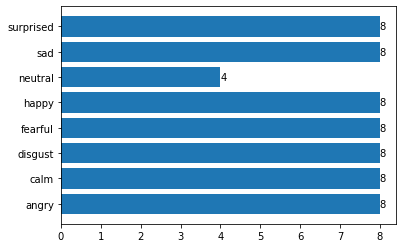

In [117]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

bars = plt.barh(y ,df.groupby('emo').size())
plt.bar_label(bars)

In [118]:
import librosa
%matplotlib inline
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio
import numpy as np
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os # interface with underlying OS that python is running on
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization, Dense
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.regularizers import l2
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [119]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [120]:
# ONE HOT ENCODE THE TARGET
lb = LabelEncoder()
y_train = to_categorical(lb.fit_transform(y_train))
y_test = to_categorical(lb.fit_transform(y_test))

In [121]:
# RESHAPE DATA TO INCLUDE 3D TENSOR 
x_train = x_train[:,:,np.newaxis]
x_test = x_test[:,:,np.newaxis]
x_train.shape

(1008, 182, 1)

In [122]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

#BUILD 1D CNN
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=(10), activation='relu', input_shape=(x_train.shape[1],1)))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu',kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv1D(128, kernel_size=(10),activation='relu'))
model.add(layers.MaxPooling1D(pool_size=(8)))
model.add(layers.Dropout(0.4))
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(8, activation='sigmoid'))
opt = keras.optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 173, 64)           704       
                                                                 
 conv1d_1 (Conv1D)           (None, 164, 128)          82048     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 20, 128)          0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 20, 128)           0         
                                                                 
 conv1d_2 (Conv1D)           (None, 11, 128)           163968    
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 128)           0         
 1D)                                                    

In [123]:
import tensorflow.keras as keras
model_history=model.fit(x_train, y_train,batch_size=32, epochs=100, validation_data=(x_test, y_test))

Epoch 1/100
32/32 [==============================] - 8s 35ms/step - loss: 2.9019 - accuracy: 0.1815 - val_loss: 2.5995 - val_accuracy: 0.2619
Epoch 2/100
32/32 [==============================] - 0s 15ms/step - loss: 2.5227 - accuracy: 0.2222 - val_loss: 2.3759 - val_accuracy: 0.2302
Epoch 3/100
32/32 [==============================] - 0s 14ms/step - loss: 2.3488 - accuracy: 0.2123 - val_loss: 2.2026 - val_accuracy: 0.2579
Epoch 4/100
32/32 [==============================] - 0s 14ms/step - loss: 2.1667 - accuracy: 0.2579 - val_loss: 2.0898 - val_accuracy: 0.2778
Epoch 5/100
32/32 [==============================] - 0s 15ms/step - loss: 2.1085 - accuracy: 0.2708 - val_loss: 2.0040 - val_accuracy: 0.2540
Epoch 6/100
32/32 [==============================] - 0s 14ms/step - loss: 1.9800 - accuracy: 0.2966 - val_loss: 1.9498 - val_accuracy: 0.2460
Epoch 7/100
32/32 [==============================] - 0s 14ms/step - loss: 1.9297 - accuracy: 0.3135 - val_loss: 1.8828 - val_accuracy: 0.3452
Epoch 

32/32 [==============================] - 0s 14ms/step - loss: 0.9865 - accuracy: 0.7133 - val_loss: 1.5125 - val_accuracy: 0.5556
Epoch 59/100
32/32 [==============================] - 0s 15ms/step - loss: 1.0051 - accuracy: 0.7173 - val_loss: 1.4258 - val_accuracy: 0.5913
Epoch 60/100
32/32 [==============================] - 0s 15ms/step - loss: 1.0541 - accuracy: 0.6925 - val_loss: 1.4578 - val_accuracy: 0.5675
Epoch 61/100
32/32 [==============================] - 0s 15ms/step - loss: 0.9575 - accuracy: 0.7520 - val_loss: 1.4305 - val_accuracy: 0.5754
Epoch 62/100
32/32 [==============================] - 0s 14ms/step - loss: 0.9583 - accuracy: 0.7341 - val_loss: 1.5271 - val_accuracy: 0.5476
Epoch 63/100
32/32 [==============================] - 0s 14ms/step - loss: 0.9281 - accuracy: 0.7450 - val_loss: 1.4536 - val_accuracy: 0.5952
Epoch 64/100
32/32 [==============================] - 0s 15ms/step - loss: 0.9451 - accuracy: 0.7460 - val_loss: 1.4836 - val_accuracy: 0.5714
Epoch 65/100

In [124]:
# PRINT LOSS AND ACCURACY PERCENTAGE ON TEST SET
print("Loss of the model is - " , model.evaluate(x_test,y_test)[0])
print("Accuracy of the model is - " , model.evaluate(x_test,y_test)[1]*100 , "%")

8/8 [==============================] - 0s 16ms/step - loss: 1.3615 - accuracy: 0.6310
Loss of the model is -  1.3614795207977295
8/8 [==============================] - 0s 15ms/step - loss: 1.3615 - accuracy: 0.6310
Accuracy of the model is -  63.09523582458496 %


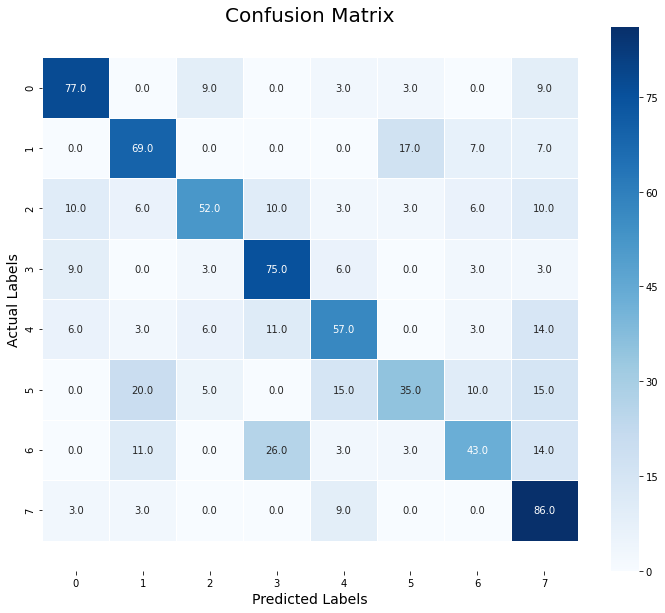

In [125]:

predictions = model.predict(x_test)
predictions = predictions.argmax(axis=1)
predictions = predictions.astype(int).flatten()
predictions = (lb.inverse_transform((predictions)))
actual = y_test.argmax(axis=1)
actual = actual.astype(int).flatten()
actual = (lb.inverse_transform((actual)))
cm = confusion_matrix(actual, predictions,normalize='true')
plt.figure(figsize = (12, 10))
#conf_matrix= pd.DataFrame(cm,columns=None)
#conf_matrix.to_csv(r'E:\confusion_matrix.csv', index = False, header=False)
ax = sns.heatmap(np.round(cm*100), linecolor='white', cmap='Blues', linewidth=1, annot=True, fmt='')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Confusion Matrix', size=20)
plt.xlabel('Predicted Labels', size=14)
plt.ylabel('Actual Labels', size=14)
#plt.savefig('Initial_Model_Confusion_Matrix.png')
plt.show()

In [126]:
cf_matrix = confusion_matrix(actual, predictions)
print(cf_matrix)

[[27  0  3  0  1  1  0  3]
 [ 0 20  0  0  0  5  2  2]
 [ 3  2 16  3  1  1  2  3]
 [ 3  0  1 24  2  0  1  1]
 [ 2  1  2  4 20  0  1  5]
 [ 0  4  1  0  3  7  2  3]
 [ 0  4  0  9  1  1 15  5]
 [ 1  1  0  0  3  0  0 30]]


In [127]:
cm = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]
#The diagonal entries are the accuracies of each class
cm.diagonal()*100

array([77.14285714, 68.96551724, 51.61290323, 75.        , 57.14285714,
       35.        , 42.85714286, 85.71428571])

Text(0.5, 1.0, 'accuracy of each class')

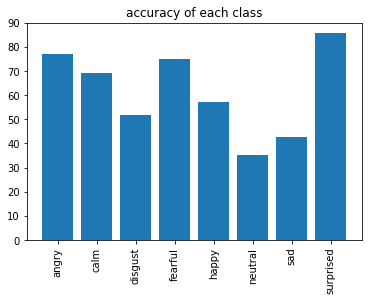

In [128]:
plt.bar(y,cm.diagonal()*100)
plt.xticks(rotation=90)
plt.title("accuracy of each class")

In [129]:
print(classification_report(actual, predictions, target_names = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']))

              precision    recall  f1-score   support

       angry       0.75      0.77      0.76        35
        calm       0.62      0.69      0.66        29
     disgust       0.70      0.52      0.59        31
        fear       0.60      0.75      0.67        32
       happy       0.65      0.57      0.61        35
     neutral       0.47      0.35      0.40        20
         sad       0.65      0.43      0.52        35
    surprise       0.58      0.86      0.69        35

    accuracy                           0.63       252
   macro avg       0.63      0.62      0.61       252
weighted avg       0.64      0.63      0.62       252



In [130]:
from imblearn.metrics import specificity_score
s=specificity_score(actual,predictions,average='macro')
print(s)

0.9471111693463297


In [131]:
from sklearn.metrics import roc_auc_score
y_score=model.predict(x_test)
auc=roc_auc_score(y_test, y_score, average='macro',multi_class='ovo')
print(auc)

0.9013232735480148


In [132]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
p=precision_score(actual,predictions,average='macro')
r=recall_score(actual,predictions,average='macro')
f=f1_score(actual,predictions,average='macro')
print(p,r,f)

0.6264471401086058 0.6167944541554107 0.6110646877804657


In [133]:
FP = cm.sum(axis=0) - np.diag(cm)  
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/(TP+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
print(TPR)
print(FPR)

[0.77142857 0.68965517 0.51612903 0.75       0.57142857 0.35
 0.42857143 0.85714286]
[0.03946264 0.06227781 0.03201531 0.06688611 0.0553736  0.0374021
 0.04190044 0.10263118]


In [134]:
l=[]
for i in range(100):
  l.append(i+1)

In [135]:
from pandas import DataFrame
C = {'epoch no':l,
    'acc train':model_history.history['accuracy'],
    'acc val':model_history.history['val_accuracy'],
    'loss train':model_history.history['loss'],
    'loss val':model_history.history['val_loss']}
df = DataFrame(C, columns= ['epoch no','acc train','acc val','loss train','loss val'])
export_csv = df.to_csv (r'E:\result1.csv', index = None, header=True) 
print (df)

    epoch no  acc train   acc val  loss train  loss val
0          1   0.181548  0.261905    2.901936  2.599527
1          2   0.222222  0.230159    2.522738  2.375877
2          3   0.212302  0.257937    2.348767  2.202613
3          4   0.257937  0.277778    2.166736  2.089803
4          5   0.270833  0.253968    2.108501  2.003977
..       ...        ...       ...         ...       ...
95        96   0.807540  0.615079    0.769314  1.624000
96        97   0.797619  0.607143    0.876248  1.630998
97        98   0.813492  0.595238    0.815105  1.710974
98        99   0.778770  0.630952    0.865025  1.538930
99       100   0.828373  0.630952    0.792331  1.361480

[100 rows x 5 columns]


In [136]:
from pandas import DataFrame
C = {
     'train acc':[str(model_history.history['accuracy'][99])],
     'test acc':[str(model_history.history['val_accuracy'][99])],
     'precision(macro)':[str(p)],
     'recall(macro)':[str(r)],
     'f1(macro)':[str(f)],
     'specificity(macro)':[str(s)],
     'AUC(macro)':[str(auc)],
     'train time per epoch':['4 sec'],
     'test time per epoch':['4 sec'],}
df = DataFrame(C, columns= ['train acc','test acc','precision(macro)','recall(macro)','f1(macro)','specificity(macro)','AUC(macro)','train time per epoch','test time per epoch'])
export_csv = df.to_csv (r'E:\result2.csv', index = None, header=True) 
print (df)

            train acc            test acc    precision(macro)  \
0  0.8283730149269104  0.6309523582458496  0.6264471401086058   

        recall(macro)           f1(macro)  specificity(macro)  \
0  0.6167944541554107  0.6110646877804657  0.9471111693463297   

           AUC(macro) train time per epoch test time per epoch  
0  0.9013232735480148                4 sec               4 sec  


In [137]:
from pandas import DataFrame
C = {
     'TPR': TPR,
     'FPR': FPR}
df = DataFrame(C, columns= ['TPR','FPR'])
export_csv = df.to_csv (r'E:\result3.csv', index = None, header=True) 
print (df)

        TPR       FPR
0  0.771429  0.039463
1  0.689655  0.062278
2  0.516129  0.032015
3  0.750000  0.066886
4  0.571429  0.055374
5  0.350000  0.037402
6  0.428571  0.041900
7  0.857143  0.102631


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'angry'),
  Text(0, 1.5, 'calm'),
  Text(0, 2.5, 'disgust'),
  Text(0, 3.5, 'fearful'),
  Text(0, 4.5, 'happy'),
  Text(0, 5.5, 'neutral'),
  Text(0, 6.5, 'sad'),
  Text(0, 7.5, 'surprised')])

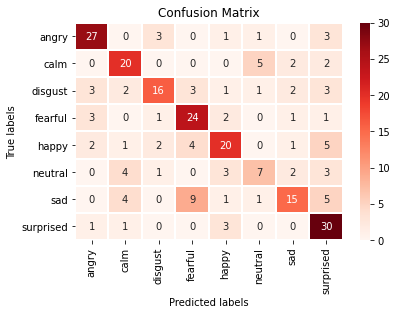

In [138]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(cf_matrix, annot=True,linecolor='white', cmap='Reds', linewidth=2, fmt='', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(y); ax.yaxis.set_ticklabels(y);
plt.xticks(rotation=90)
plt.yticks(rotation=0)

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0, 0.5, 'angry'),
  Text(0, 1.5, 'calm'),
  Text(0, 2.5, 'disgust'),
  Text(0, 3.5, 'fearful'),
  Text(0, 4.5, 'happy'),
  Text(0, 5.5, 'neutral'),
  Text(0, 6.5, 'sad'),
  Text(0, 7.5, 'surprised')])

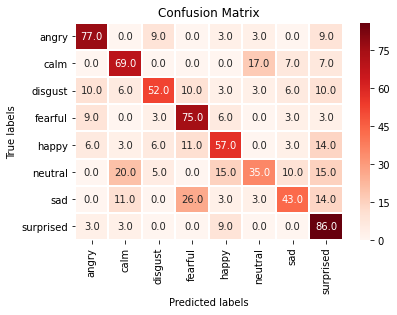

In [139]:
import seaborn as sns
import matplotlib.pyplot as plt     

ax= plt.subplot()
sns.heatmap(np.round(cm*100), annot=True,linecolor='white', cmap='Reds', linewidth=2, fmt='', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(y); ax.yaxis.set_ticklabels(y);
plt.xticks(rotation=90)
plt.yticks(rotation=0)
